In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

%matplotlib inline
plt.style.use('seaborn')

# Losses

In [2]:
def load_losses(path_D, path_G, step_lim=2000000, smooth=0.95):
    df_d = pd.read_csv(path_D)
    df_g = pd.read_csv(path_G)
    
    df_d = df_d[['Step', 'Value']]
    df_d.columns = ['Step', 'D_GAN']

    df_g = df_g[['Step', 'Value']]
    df_g.columns = ['Step', 'G_GAN']
    
    df = df_d.merge(df_g, on='Step')
    df = df.loc[df.Step < step_lim]
    df['Step'] = df['Step'] / 100000

    D_smooth = [df.D_GAN[0]]
    G_smooth = [df.G_GAN[0]]
    for i in range(1, df.shape[0]):
        D_smooth.append(D_smooth[i-1] * smooth + (1 - smooth) * df.D_GAN[i])
        G_smooth.append(G_smooth[i-1] * smooth + (1 - smooth) * df.G_GAN[i])

    df['D_GAN_smooth'] = D_smooth
    df['G_GAN_smooth'] = G_smooth
    
    return df

In [3]:
def plot_losses(df, x_lim=[-1, 21], y_lim=[-0.3, 6]):
    plt.plot(df['Step'], df['D_GAN_smooth'])
    plt.plot(df['Step'], df['G_GAN_smooth'])

    plt.plot(df['Step'], df['D_GAN'], alpha=0.1, color='blue')
    plt.plot(df['Step'], df['G_GAN'], alpha=0.1, color='green')

    plt.xlabel('Number of images seen (in 100 thousands)')
    plt.xticks(np.arange(0, x_lim[1], step=5))
    
    plt.legend(['Discriminator Loss', 'Generator Loss'])

    plt.xlim(x_lim)
    plt.ylim(y_lim)

In [4]:
loss_dir = '../../Report/tensorboard/pix2pix/'

orig = os.path.join(loss_dir, 'original')
soft = os.path.join(loss_dir, 'soft_labels')

df_orig = load_losses(os.path.join(orig, 'D_fake.csv'), os.path.join(orig, 'G_GAN.csv'))
df_soft = load_losses(os.path.join(soft, 'D_fake.csv'), os.path.join(soft, 'G_GAN.csv'))

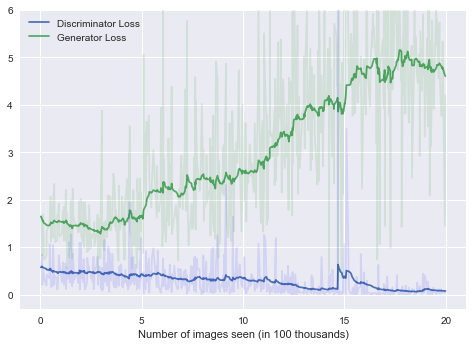

In [5]:
plot_losses(df_orig)

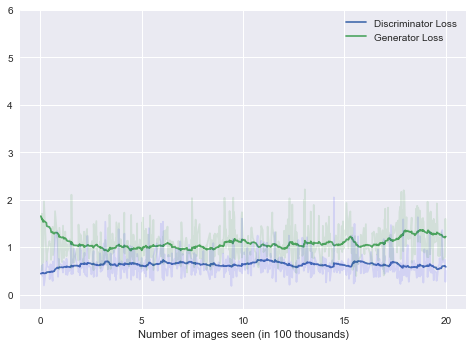

In [6]:
plot_losses(df_soft)

# Images

In [2]:
def concat_images(img_paths, concat_axis=0):
    imgs = []
    for img_path in img_paths:
        imgs.append(np.array(Image.open(img_path)))

    imgs = np.concatenate(imgs, axis=concat_axis)
    img = Image.fromarray(imgs)
    
    return img

In [37]:
def merge_product_images(img_dir, save_dir):
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # load images
    test_files = glob.glob(os.path.join(img_dir, '*.png'))
    test_files = sorted(test_files)
    
    # split to realA, realB and fakeB lists
    test_realA = [t for t in test_files if 'real_A' in t]
    test_realB = [t for t in test_files if 'real_B' in t]
    test_fakeA = [t for t in test_files if 'fake_A' in t]
    test_fakeB = [t for t in test_files if 'fake_B' in t]
    
    save_dir_A = os.path.join(save_dir, 'A')
    save_dir_B = os.path.join(save_dir, 'B')
    
    if not os.path.exists(save_dir_A):
        os.makedirs(save_dir_A)
    if not os.path.exists(save_dir_B):
        os.makedirs(save_dir_B)
    
    for test_imgs in zip(test_realA, test_fakeB):
        img = concat_images(test_imgs, concat_axis=1)
        path_name = os.path.basename(test_imgs[0]).replace('_real_A', '')
        img.save(os.path.join(save_dir_A, path_name))
    
    for test_imgs in zip(test_realB, test_fakeA):
        img = concat_images(test_imgs, concat_axis=1)
        path_name = os.path.basename(test_imgs[0]).replace('_real_B', '')
        img.save(os.path.join(save_dir_B, path_name))

In [38]:
def make_image_grid(img_dir, save_dir, grid_size=10):
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    test_files = glob.glob(os.path.join(img_dir, '*.png'))
    test_files = sorted(test_files)
    
    for i in range(len(test_files)//grid_size):
        idx = i*grid_size
        test_imgs = test_files[idx:idx+grid_size]
        
        img = concat_images(test_imgs, concat_axis=0)
        path_name = os.path.basename(test_imgs[0])
        img.save(os.path.join(save_dir, path_name))

In [39]:
img_dirs = glob.glob('../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/*')
# img_dirs = sorted([os.path.join(d, 'test_140/images') for d in img_dirs])
img_dirs

['../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/test_latest',
 '../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/test_120',
 '../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/test_130']

In [40]:
for img_dir in img_dirs:
    print(img_dir)
    
    root_dir = os.path.dirname(img_dir)
    
    save_dir = os.path.join(img_dir, 'images_merged')
    merge_product_images(img_dir, save_dir)
    
#     save_dir_grid = os.path.join(img_dir, 'images_grid')
#     make_image_grid(save_dir, save_dir_grid)

../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/test_latest
../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/test_120
../pytorch-CycleGAN-and-pix2pix/results/cycle/floral_lr/test_130


# Thesis Images

In [89]:
thesis_dirs = img_dirs

In [90]:
thesis_dirs

['../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images',
 '../pytorch-CycleGAN-and-pix2pix/results/2_dresses_to_models_soft_labels/test_140/images',
 '../pytorch-CycleGAN-and-pix2pix/results/3_dresses_to_models_lr_fliplower/test_140/images',
 '../pytorch-CycleGAN-and-pix2pix/results/4_dresses_to_models_fliplower/test_140/images',
 '../pytorch-CycleGAN-and-pix2pix/results/5_dresses_to_models_lambda_fliplower/test_140/images']

In [96]:
imgs = sorted([
        '5650426_474241944',
        '9774305',
        '9815337',
        '605423287',
        '605409945',
        '292201006',
        '4059987026523',
        '5713611404611',
        '5713734463984',
        '5713780514210',
        '181015997465534',
        'CLO0070001000003',
        'CLO0099001000004',
        'L4221C0JH-Q11',
        'NEW1407001000004',
        'SA321C05Q-Q11',
        'SG721C09I-A11',
        'SWG0066001000004',
        'VK121C018-A11',
        'VL421C00G-K11',
        'ASB0529001000001',
        'M6421C04N-K11',
])

In [97]:
real_files = sorted(glob.glob(os.path.join(thesis_dirs[0], '*.png')))
realA_files = [f for f in real_files if ('real_A' in f) and any(i in f for i in imgs)]
realB_files = [f for f in real_files if ('real_B' in f) and any(i in f for i in imgs)]

In [98]:
print(len(realA_files), len(realB_files))

22 22


In [99]:
fakeB_files = []

for i in imgs:
    i_fake = []
    
    for test_dir in thesis_dirs:
        i_fake.append(os.path.join(test_dir, i + '_fake_B.png'))
    
    fakeB_files.append(i_fake)

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/181015997465534_real_A.png


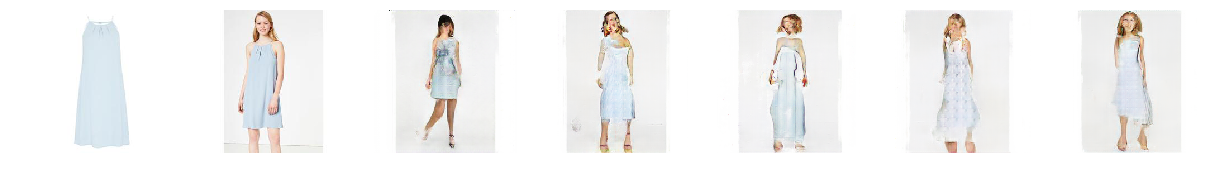

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/292201006_real_A.png


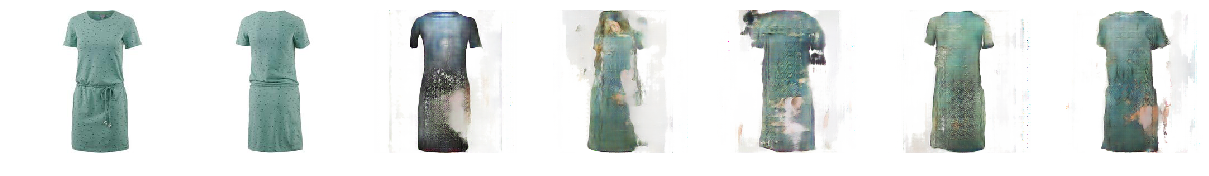

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/4059987026523_real_A.png


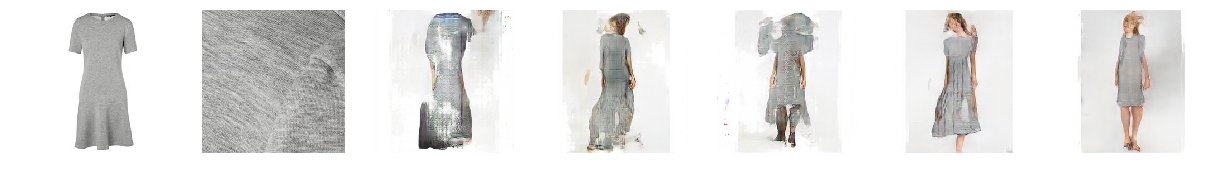

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/5650426_474241944_real_A.png


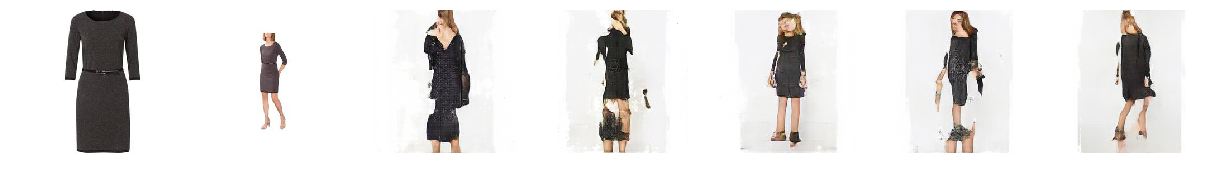

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/5713611404611_real_A.png


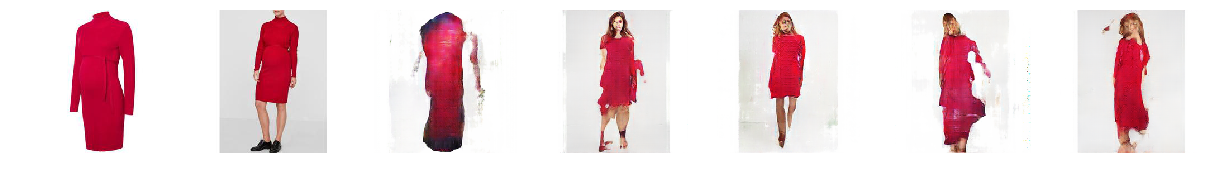

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/5713734463984_real_A.png


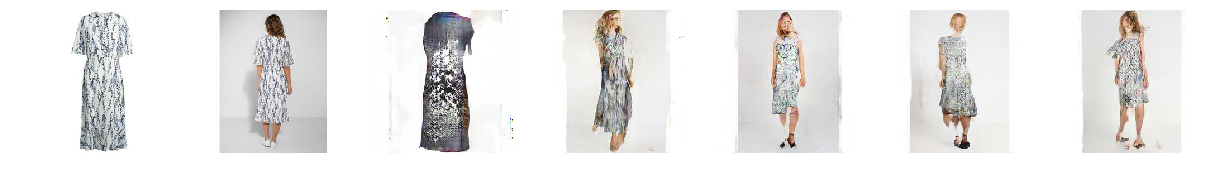

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/5713780514210_real_A.png


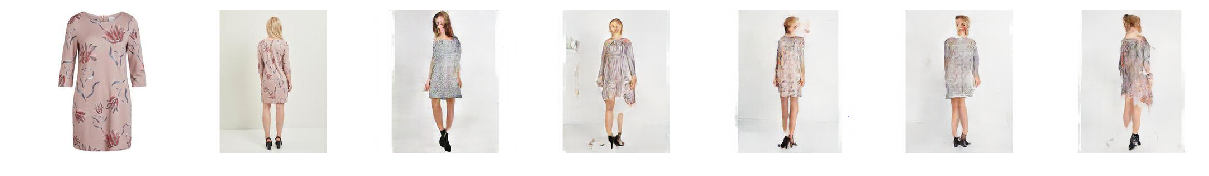

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/605409945_real_A.png


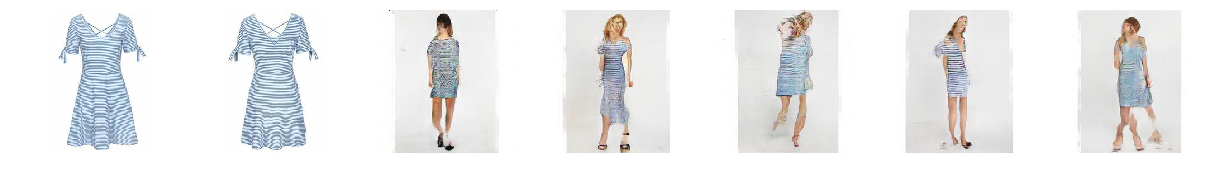

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/605423287_real_A.png


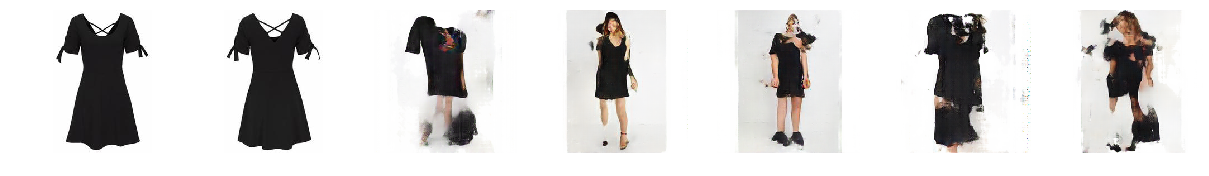

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/9774305_real_A.png


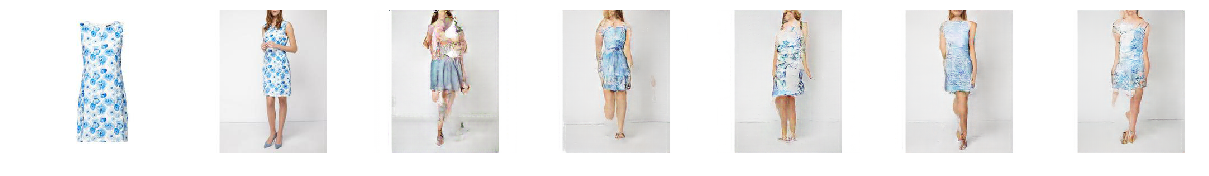

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/9815337_real_A.png


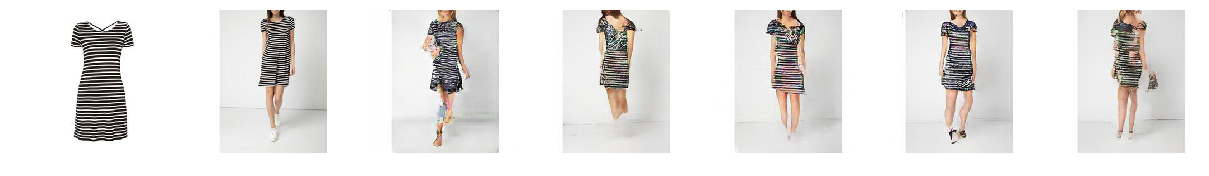

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/ASB0529001000001_real_A.png


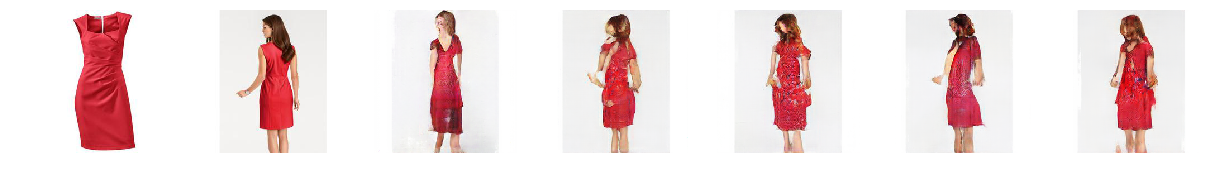

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/CLO0070001000003_real_A.png


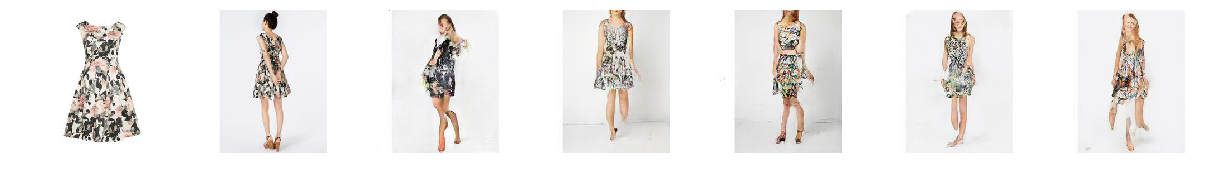

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/CLO0099001000004_real_A.png


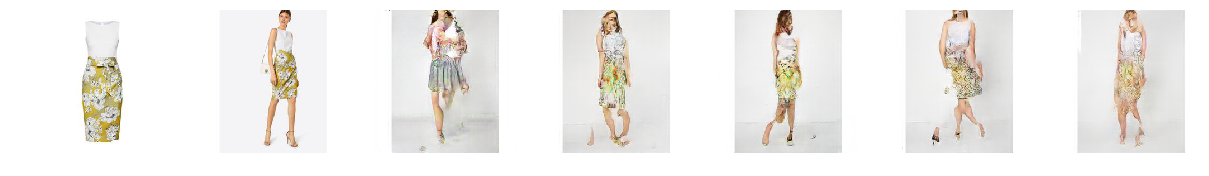

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/L4221C0JH-Q11_real_A.png


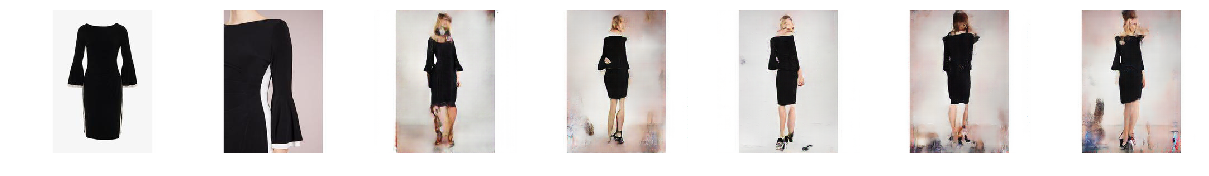

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/M6421C04N-K11_real_A.png


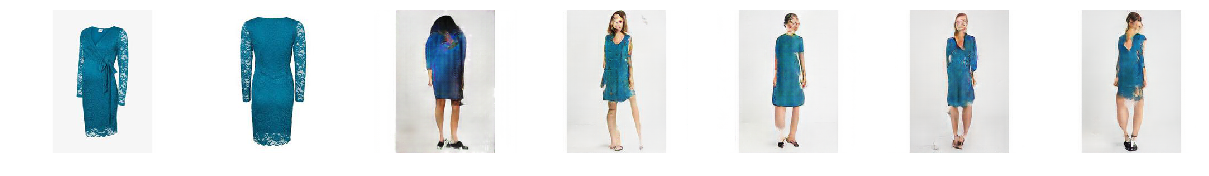

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/NEW1407001000004_real_A.png


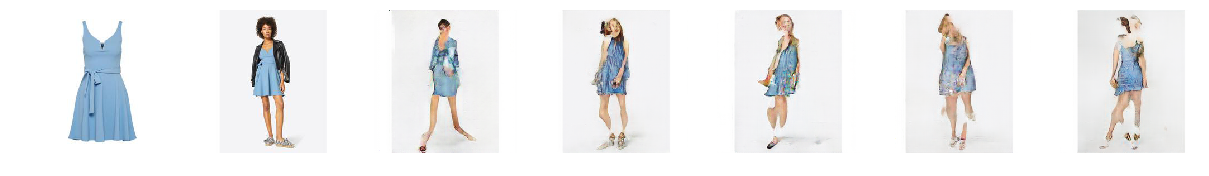

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/SA321C05Q-Q11_real_A.png


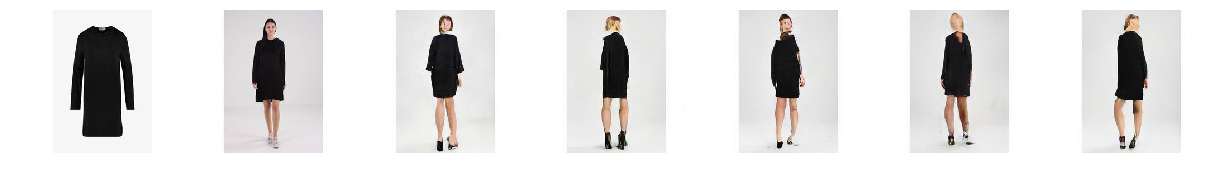

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/SG721C09I-A11_real_A.png


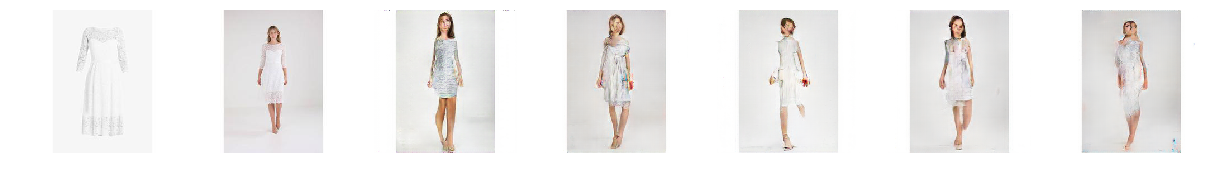

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/SWG0066001000004_real_A.png


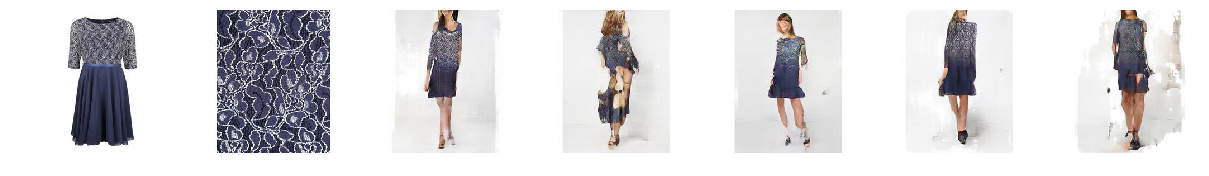

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/VK121C018-A11_real_A.png


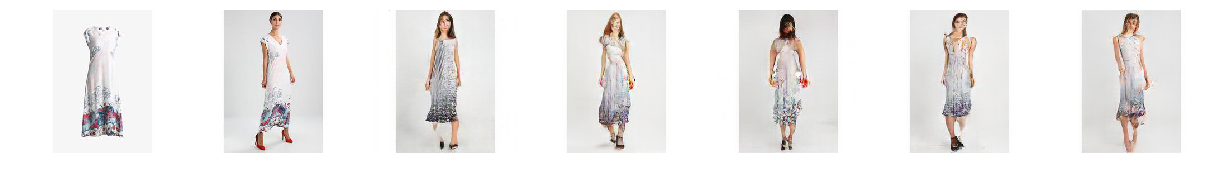

../pytorch-CycleGAN-and-pix2pix/results/1_dresses_to_models_new/test_140/images/VL421C00G-K11_real_A.png


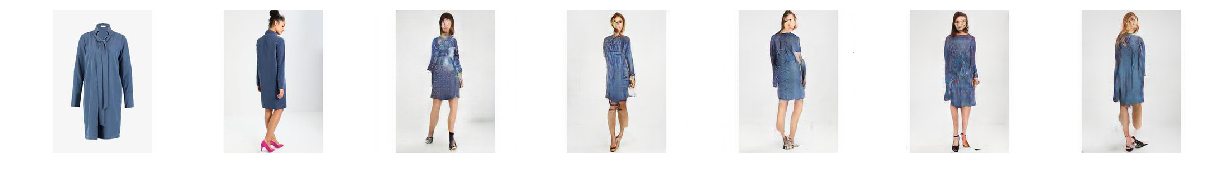

In [100]:
for realA_path, realB_path, fakeB_paths in zip(realA_files, realB_files, fakeB_files):
    num_imgs = len(fakeB_paths)+2
    
    print(realA_path)
    
    fig, axarr = plt.subplots(1, num_imgs, figsize=(num_imgs*3, 3))
    
    axarr[0].imshow(Image.open(realA_path))
    axarr[1].imshow(Image.open(realB_path))
    
    for idx, path in enumerate(fakeB_paths):
        axarr[idx+2].imshow(Image.open(path))
        
    for ax in axarr:
        ax.axis('off')
    
    plt.show()